You need to have specific versions installed for the end result to be able to be converted to a format Tensorflow JS can use.
- `pip install tensorflow==2.15.0`
- `pip install tensorflow_decision_forests==1.8.1`

# Load and Preprocess MNIST Data
Load MNIST dataset using keras.datasets, normalize pixel values, and prepare training/test splits.

In [17]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Print the shapes of the datasets
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


# Build Neural Network Model
Create a sequential model with dense layers, including input layer, hidden layers, and output layer for digit classification.

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Build the neural network model
model = Sequential([
    # Input layer
    Flatten(input_shape=(28, 28)),
    Dense(16, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    # Output layer with 10 neurons (one for each digit) and softmax activation
    Dense(10, activation='softmax')
])

# Print the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 16)                12560     
                                                                 
 dense_9 (Dense)             (None, 16)                272       
                                                                 
 dense_10 (Dense)            (None, 8)                 136       
                                                                 
 dense_11 (Dense)            (None, 10)                90        
                                                                 
Total params: 13058 (51.01 KB)
Trainable params: 13058 (51.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Configure Training Parameters
Set up model compilation with optimizer, loss function, and metrics for training.

In [19]:
# Configure Training Parameters
model.compile(
    optimizer='adam',  # Use Adam optimizer
    loss='sparse_categorical_crossentropy',  # Use sparse categorical crossentropy as the loss function
    metrics=['accuracy']  # Track accuracy during training
)

# Train the Model
Train the neural network on the MNIST training data with specified batch size and epochs.

In [ ]:
# Train the Model
batch_size = 32  # Set the batch size
epochs = 10  # Set the number of epochs

# Train the model on the training data
history = model.fit(
    x_train, y_train,  # Training data and labels
    batch_size=batch_size,  # Batch size
    epochs=epochs,  # Number of epochs
    validation_data=(x_test, y_test)  # Validation data and labels
)

# Print the training history keys
print(history.history.keys())

Epoch 1/10
938/938 [==============================] - 2s 2ms/step - loss: 0.6615 - accuracy: 0.7850 - val_loss: 0.3161 - val_accuracy: 0.9059
Epoch 2/10
938/938 [==============================] - 1s 2ms/step - loss: 0.2775 - accuracy: 0.9198 - val_loss: 0.2447 - val_accuracy: 0.9262
Epoch 3/10
938/938 [==============================] - 1s 1ms/step - loss: 0.2251 - accuracy: 0.9347 - val_loss: 0.2097 - val_accuracy: 0.9368
Epoch 4/10
938/938 [==============================] - 1s 1ms/step - loss: 0.2008 - accuracy: 0.9409 - val_loss: 0.2115 - val_accuracy: 0.9375
Epoch 5/10
938/938 [==============================] - 1s 2ms/step - loss: 0.1837 - accuracy: 0.9466 - val_loss: 0.1892 - val_accuracy: 0.9426
Epoch 6/10
938/938 [==============================] - 1s 1ms/step - loss: 0.1740 - accuracy: 0.9489 - val_loss: 0.1778 - val_accuracy: 0.9471
Epoch 7/10
938/938 [==============================] - 1s 1ms/step - loss: 0.1666 - accuracy: 0.9511 - val_loss: 0.1848 - val_accuracy: 0.9459
Epoch 

# Evaluate Model Performance
Test the model's performance on the test dataset and display accuracy metrics.

313/313 - 0s - loss: 0.1771 - accuracy: 0.9473 - 257ms/epoch - 820us/step
Test accuracy: 0.9473


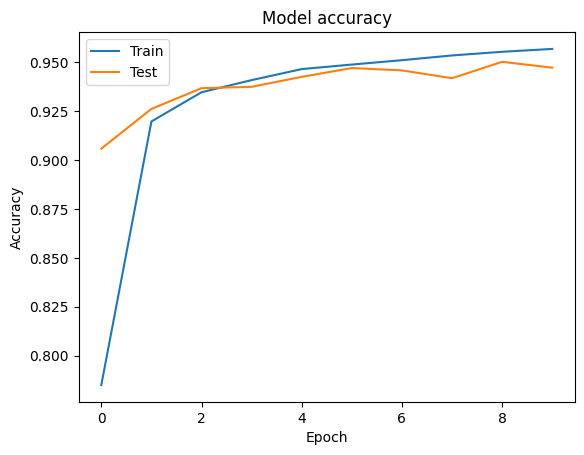

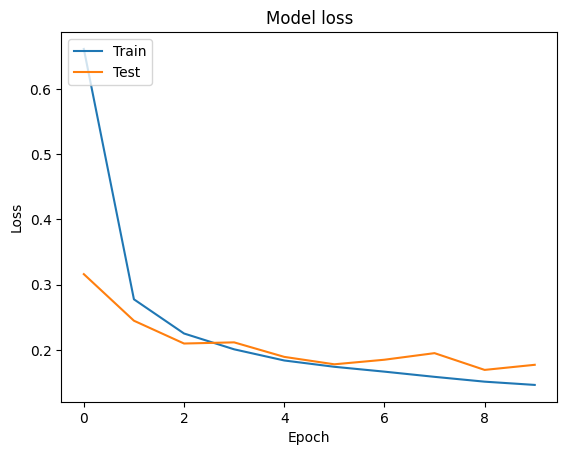

In [21]:
# Evaluate Model Performance

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)

# Print the test accuracy
print(f"Test accuracy: {test_accuracy:.4f}")

# Plot training & validation accuracy values
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Visualize Predictions
Display sample test images and their predicted digits alongside true labels.

313/313 [==============================] - 0s 855us/step


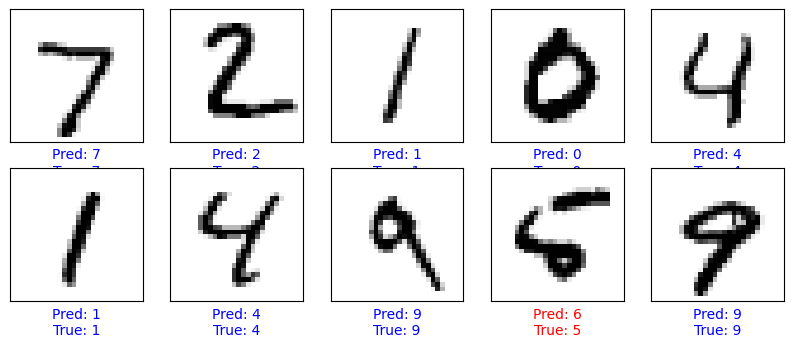

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Predict the labels for the test set
predictions = model.predict(x_test)

# Function to plot images along with their predicted and true labels
def plot_images(images, true_labels, predicted_labels, num_images=10):
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        predicted_label = np.argmax(predicted_labels[i])
        true_label = true_labels[i]
        color = 'blue' if predicted_label == true_label else 'red'
        plt.xlabel(f"Pred: {predicted_label}\nTrue: {true_label}", color=color)
    plt.show()

# Plot sample test images with their predicted and true labels
plot_images(x_test, y_test, predictions)

Export the model for use by the web app.

In [23]:
import tensorflowjs as tfjs

tfjs.converters.save_keras_model(model, "numbers")

In [24]:
import shutil
import os

# Create target directory if it doesn't exist
target_dir = '../public/models/numbers'
os.makedirs(target_dir, exist_ok=True)

# Copy files to directory for use by the web app
for file in os.listdir('numbers'):
    source = os.path.join('numbers', file)
    destination = os.path.join(target_dir, file)
    shutil.copy2(source, destination)
    print(f"Copied {file} to {destination}")

Copied .gitignore to ../public/models/numbers/.gitignore
Copied model.json to ../public/models/numbers/model.json
Copied group1-shard1of1.bin to ../public/models/numbers/group1-shard1of1.bin
